# Q&A Activity Week 04

### importing libraries

In [31]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### importing and displaying dataset

In [162]:
telco = pd.read_csv('Telco-Customer-Churn.csv')

df_telco = pd.DataFrame(telco_customer_churn)

df_telco.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 1. Compare the churn count with respect to gender

##### a. using count plot

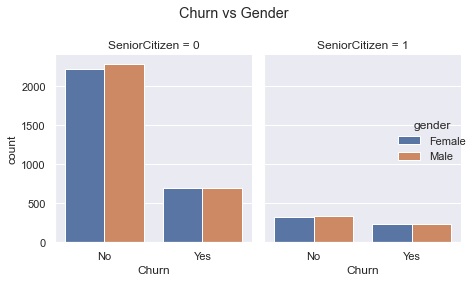

In [120]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme(style="darkgrid")

churn_plot = sns.catplot(x="Churn", hue="gender", col="SeniorCitizen",
                data=df_telco, kind="count",
                height=4, aspect=.7);

churn_plot.fig.suptitle('Churn vs Gender')
plt.tight_layout()




##### b. using pie chart

[]

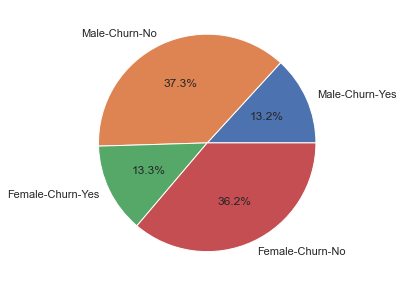

In [193]:
churn_yes = df_telco[df_telco['Churn'] == 'Yes']
churn_no = df_telco[df_telco['Churn'] == 'No']

data = [len(churn_yes[churn_yes['gender'] == 'Male'])
        ,len(churn_no[churn_no['gender'] == 'Male'])
        ,len(churn_yes[churn_yes['gender'] == 'Female'])
        ,len(churn_no[churn_no['gender'] == 'Female'])]

plt.pie(data, labels = ['Male-Churn-Yes','Male-Churn-No','Female-Churn-Yes','Female-Churn-No'], autopct='%1.1f%%')

plt.plot()

#### 2. Find out how many female senior citizens are there in the dataset

Female senior citizens count: 568


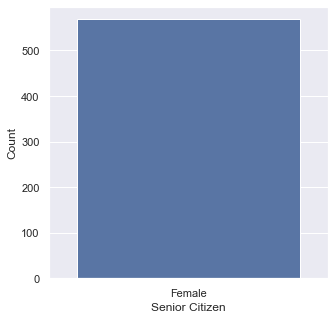

In [161]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme(style="darkgrid")

female_senior = df_telco[(df_telco['SeniorCitizen']==1) & (df_telco['gender']=='Female')]


sns.countplot(x = 'gender', data = female_senior)
plt.xlabel('Senior Citizen')
plt.ylabel('Count')

print('Female senior citizens count:',female_senior['SeniorCitizen'].sum())


#### 3. Compare 'tenure' with 'Total Charges'

Text(0, 0.5, 'Total Charges')

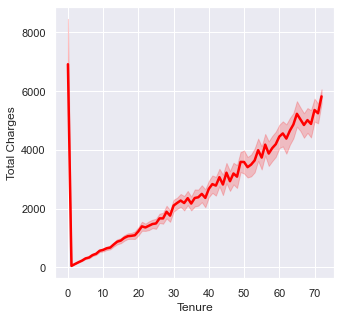

In [159]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme(style="darkgrid")

sns.lineplot(data=df_telco, x="tenure", y="TotalCharges",color='red', linewidth=2.5)
plt.xlabel('Tenure')
plt.ylabel('Total Charges')

#### 4. Find out which contract is preferred by the senior citizen.

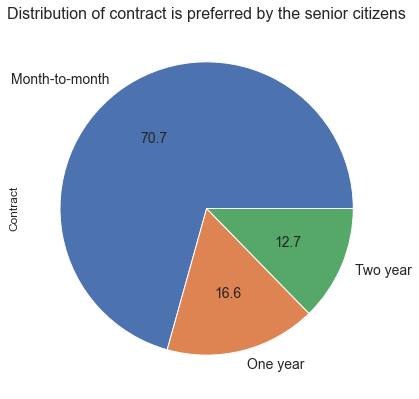

Month-to-month is the most preferred contract among the senior citizens.


In [155]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme(style="darkgrid")

sn= df_telco[df_telco["SeniorCitizen"]==1]
plt.figure(figsize=(6,6))
plt.title( "Distribution of contract is preferred by the senior citizens",fontsize=16) 
sn.Contract.value_counts(sort=True).plot.pie(fontsize=14,autopct ='%1.1f')
centre_circle = plt.Circle((0,0),0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()
print("Month-to-month is the most preferred contract among the senior citizens.")

#### 5. Comment on your finds on Payment Method?

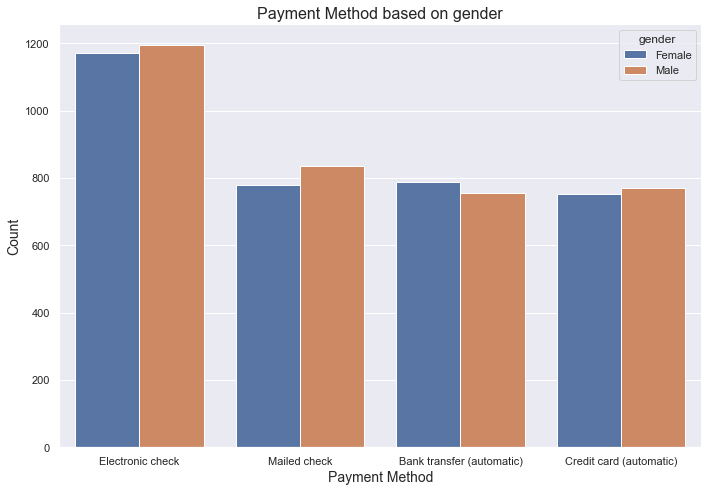

Observations are: 
1. Electronic Check is the most used payment method by both the genders.
2. Only bank transfer method is done more by men.


In [198]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme(style="darkgrid")

plt.figure(figsize=(10,7))
sns.countplot(data = df_telco, x = 'PaymentMethod', hue=df_telco['gender'])
sns.despine()
plt.title( "Payment Method based on gender",fontsize=16) 
plt.xlabel('Payment Method', fontsize=14)
plt.ylabel('Count',fontsize=14) 
plt.tight_layout()
plt.show()

print("Observations are: ")
print("1. Electronic Check is the most used payment method by both the genders.")
print("2. Only bank transfer method is done more by men.")